## Projeto soybean compra venda mantem

### Objective:
- This project aims to create clusters defined according to the characteristics of credit card holders, grouping these holders and characterizing the clusters based on the occurrence of the variables used.

- Esse projeto tem como objetivo treinar um modelo, utilizando aprendizado por reforço, que nos orientará se no momento atual devemos comprar, vender ou manter os títulos (contratos) de soja futuros.

### Data Origin:
- Dataset: https://www.kaggle.com/datasets/choweric/cbot-soybeans/data

- This project aims to train a model, using reinforcement learning, that will guide us whether we should currently buy, sell or hold future soybean bonds (contracts).

- O Dataset de cotação do preço da soja apresenta cotações diárias com data do dia de cotação dos valores de títulos futuros da soja na bolsa de valores, com valores percorridos durante todo o dia.

- A seguir está o Dicionário de Dados para o conjunto de dados cotação de título de soja:

    Date: data da ocorrência da cotação

    Open: valor cotado na abertura dos trabalhos de negociação

    High: valor máximo atingido no período de negociação

    Low:  valor mínimo atingido no período de negociação

    Volume: nro de contratos negociados no período de negociação
    
    Open interest: fluxo de dinheiro para dentro ou para fora de um mercado de futuros

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [355]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [356]:
# preparação e visualização de dados
from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame

from sklearn.preprocessing import (
    #OneHotEncoder, # transforma dados categóricos em colunas e valores binário 0-1
    #StandardScaler, # faz a padronização dos dados para melhorar a normalidade
    MinMaxScaler, # transforma os valores dentro de uma escala entre 0 e 1 e melhora a normalidade
    PowerTransformer, # transforma os valores para melhorar a normalidade
)

from matplotlib import pyplot as plt # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib

In [357]:
#import quandl
#quandl.ApiConfig.api_key = 'g6yeFE8yJLssq1bfySKy'
#df_soy = pd.DataFrame(quandl.get('WIKI/XXXXX'))

In [358]:
df_soy = pd.read_csv('dataset/CME_SF2000.csv', sep=',')

for ano in range(2001, 2023):
    dfx = pd.read_csv('dataset/CME_SF' + str(ano) + '.csv', sep=',')
    df_soy = pd.concat([df_soy, dfx], axis=0)
    #print(ano)

In [359]:
# verificando a quantidade de linhas e colunas do dataframe
df_soy.shape

(10128, 7)

In [360]:
# reconhecendo as primeiras linhas do dataframe
df_soy.head(3)

,Date,Open,High,Low,Close,Volume,Open Interest
0,2000-01-14,480.0,490.0,480.0,485.50,992.0,175.0
1,2000-01-13,472.5,483.5,471.0,481.75,1821.0,1296.0
2,2000-01-12,479.0,479.0,471.5,472.50,3974.0,2029.0


In [361]:
df_soy['Date'] = df_soy['Date'].astype('datetime64[ns]')

In [362]:
# verificando a renomeação das colunas
# reconhecendo as variáveis disponíveis
# verificando se há dados nulos
df_soy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10128 entries, 0 to 546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           10128 non-null  datetime64[ns]
 1   Open           10128 non-null  float64       
 2   High           10128 non-null  float64       
 3   Low            10128 non-null  float64       
 4   Close          10128 non-null  float64       
 5   Volume         10128 non-null  float64       
 6   Open Interest  10128 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 633.0 KB


- Observando que não há nulos nas variáveis.

In [363]:
# confirmando a inexistência de nulos
df_soy.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

- Confirmando, através da função isnull(), que não existem nulos no dataframe.

In [364]:
# verificando se existe registros duplicados
df_soy.duplicated().sum()

0

Não existe linhas duplicadas

In [365]:
df_soy.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Interest']

In [366]:
df_soy['Year'] = df_soy['Date'].dt.year
df_soy['Month'] = df_soy['Date'].dt.month

In [367]:
# verificando o conteudo de cada coluna (variável) do dataframe
pd.set_option('display.width', 100)
df_soy.head(10)

,Date,Open,High,Low,Close,Volume,Open_Interest,Year,Month
0,2000-01-14,480.0,490.00,480.00,485.50,992.0,175.0,2000,1
1,2000-01-13,472.5,483.50,471.00,481.75,1821.0,1296.0,2000,1
2,2000-01-12,479.0,479.00,471.50,472.50,3974.0,2029.0,2000,1
3,2000-01-11,465.0,470.75,464.00,467.00,4544.0,2841.0,2000,1
4,2000-01-10,466.0,469.25,465.00,466.25,6265.0,3635.0,2000,1
5,2000-01-07,467.5,472.00,466.50,471.50,8942.0,4491.0,2000,1
6,2000-01-06,469.5,473.00,468.00,468.00,7559.0,6477.0,2000,1
7,2000-01-05,464.0,470.00,462.50,469.25,11035.0,7495.0,2000,1
8,2000-01-04,458.5,466.00,458.25,464.25,8543.0,10015.0,2000,1
9,2000-01-03,464.0,466.00,455.75,456.50,6168.0,11516.0,2000,1


- Observamos que temos todas as variáveis numéricas, algumas contínuas e outras discretas.
- Vamos manter as variáveis como estão e aprofundar mais em suas características.

In [368]:
df_soy.groupby(df_soy['Date'].dt.year)['Date'].count()

Date
1998     36
1999    251
2000    290
2001    272
2002    344
2003    306
2004    316
2005    359
2006    356
2007    441
2008    401
2009    545
2010    547
2011    514
2012    547
2013    546
2014    546
2015    546
2016    546
2017    543
2018    545
2019    545
2020    515
2021    261
2022     10
Name: Date, dtype: int64

In [369]:
df_soy = df_soy.drop(df_soy.loc[df_soy['Date'].dt.year==1998].index)
df_soy = df_soy.drop(df_soy.loc[df_soy['Date'].dt.year==2022].index)

In [370]:
df_soy.groupby(df_soy['Date'].dt.year)['Date'].count()

Date
1999    251
2000    267
2001    259
2002    308
2003    270
2004    280
2005    323
2006    320
2007    406
2008    354
2009    502
2010    510
2011    469
2012    502
2013    502
2014    501
2015    502
2016    502
2017    499
2018    500
2019    510
2020    490
2021    249
Name: Date, dtype: int64

In [371]:
# montando a query para agrupar a soma dos valores por cluster
from pandasql import sqldf

df_fim_ano = sqldf(
             " select Year, max(Date) as Date_group, avg(Close) as Close_group," \
             "        avg(Volume) as Volume_group, avg(Open_Interest) as Open_Interest_group"
             " from df_soy " \
             " where Month = 12 " \
             " group by 1 " \
             " order by 1 "
             )

In [372]:
df_fim_ano

,Year,Date_group,Close_group,Volume_group,Open_Interest_group
0,1999,1999-12-30 00:00:00.000000,462.476190,23309.380952,52490.380952
1,2000,2000-12-29 00:00:00.000000,513.071429,16431.178571,38389.250000
2,2001,2001-12-31 00:00:00.000000,436.025000,24364.600000,50951.600000
3,2002,2002-12-31 00:00:00.000000,566.675000,30992.900000,56438.600000
4,2003,2003-12-31 00:00:00.000000,770.704545,27683.681818,69657.045455
5,2004,2004-12-30 00:00:00.000000,540.476190,30288.523810,66677.095238
6,2005,2005-12-30 00:00:00.000000,591.181818,36661.590909,82450.000000
7,2006,2006-12-29 00:00:00.000000,662.175000,19901.250000,106013.600000
8,2007,2007-12-31 00:00:00.000000,1151.437500,18771.950000,150021.750000
9,2008,2008-12-31 00:00:00.000000,890.392045,3010.454545,38624.340909


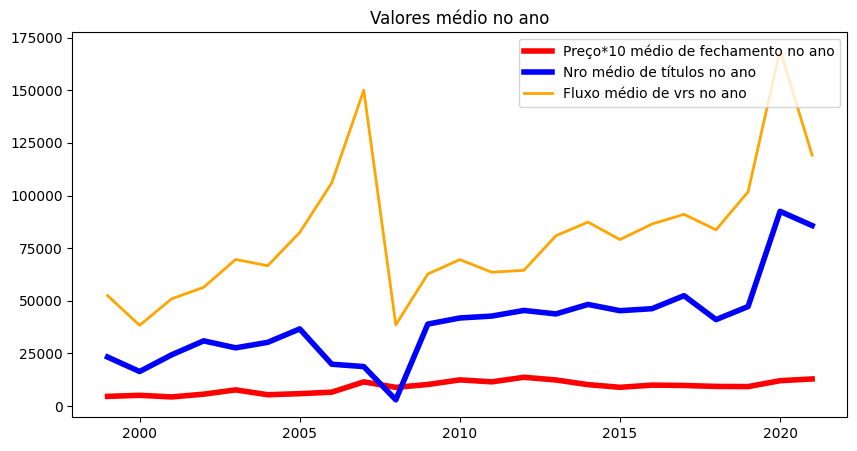

In [373]:
# plot da cotação do preço da cenoura de verão AAA e inverno A com a variação da temperatura x10 para melhor comparar
# a variação entre o Preço e a Temperatura os dados que serão plotados são os originais, sem a normalização
fig,ax = plt.subplots(ncols=1,figsize=(10,5))

plt.plot(df_fim_ano.Year, df_fim_ano.Close_group*10, label = "Preço*10 médio de fechamento no ano", linewidth=4, color='red') 
plt.plot(df_fim_ano.Year, df_fim_ano.Volume_group, label = "Nro médio de títulos no ano", linewidth=4, color='blue') 
plt.plot(df_fim_ano.Year, df_fim_ano.Open_Interest_group, label = "Fluxo médio de vrs no ano", linewidth=2, color='orange')  

plt.title('Valores médio no ano')
plt.legend() 

plt.savefig('grafic_image/valores_medio_ano.png', format='png')
plt.show()

In [374]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_soy.sort_index().to_csv('df_treated/df_soy_treated.csv', index=False)